In [1]:
############ LOAD PACKAGES
import numpy as np
import pandas as pd
import tifffile as tf
import matplotlib.pyplot as plt

# import custum colormaps
from colormaps import *

# import custum functions
from STP_plotting import *
from STP_processing import *

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2

In [8]:
# set-up vars
home_dir = "/Volumes/Data/"
# home_dir = "/mnt/labNAS/"

in_path = home_dir+"Emily/STP_for_MAPseq/4_python_output/input_tifs/"
out_path = home_dir+"Emily/STP_for_MAPseq/4_python_output/output_figs/"

metadata = pd.read_csv("stp_metadata.csv")
meta = metadata[metadata["inj_site"]=="OMC"].reset_index(drop=True)

In [9]:

# # import 230429 STeg brain- seems to be brighter than others???
# steg_hs_asr = home_dir+"Emily/STP_for_MAPseq/2_fiji_adjusted/OMC_STeg_220429_b2_hand_straightened_asr.tif"
# steg = tf.imread(steg_hs_asr)

# # import example lab mouse aligned to sm
# mmus_to_st_tif = in_path+"norm_subtracted/STeg_220429_aligned/OMC_MMus_220119_b0_aligned_to_STeg_220429_NO_subtracted.tif"
# mmus = tf.imread(mmus_to_st_tif)


In [11]:
# import all tiff files aligned to STeg_220429
p05_path = in_path+"norm_subtracted/STeg_220429_aligned/"
p05_images = []
for i in range(meta.shape[0]):
    print("loading:", meta.loc[i, "brain"])
    p05_images.append(tf.imread(p05_path+meta.loc[i,'brain']+"_aligned_to_STeg_220429_NO_subtracted.tif"))
    # p05_images.append(tf.imread(p05_path+meta.loc[i,'brain']+"_p05_norm_subtracted.tif"))


loading: OMC_MMus_220119_b0
loading: OMC_MMus_220303_b1
loading: OMC_MMus_220324_b2
loading: OMC_STeg_220208_b0
loading: OMC_STeg_220411_b1
loading: OMC_STeg_220429_b2


In [23]:
# create species averages from 3 replicates
# mmus = meta[0:3]
mmus_avg = np.array(p05_images[0:3]).mean(axis=0)

# steg = meta[3:]
steg_avg = np.array(p05_images[3:]).mean(axis=0)


In [33]:
# import all tiff files aligned to STeg_220429 - WITH SUBTRACTION
p05_path = in_path+"norm_subtracted/STeg_220429_aligned/"
p05_images_sub = []
for i in range(meta.shape[0]):
    print("loading:", meta.loc[i, "brain"])
    p05_images_sub.append(tf.imread(p05_path+meta.loc[i,'brain']+"_aligned_to_STeg_220429_norm_subtracted.tif"))


loading: OMC_MMus_220119_b0
loading: OMC_MMus_220303_b1
loading: OMC_MMus_220324_b2
loading: OMC_STeg_220208_b0
loading: OMC_STeg_220411_b1
loading: OMC_STeg_220429_b2


In [44]:

# create species averages from 3 replicates
# mmus = meta[0:3]
mmus_avg_sub = np.array(p05_images_sub[0:3]).mean(axis=0)

# steg = meta[3:]
steg_avg_sub = np.array(p05_images_sub[3:]).mean(axis=0)


In [24]:
# import boundaries
# import aligned to hand-straight
boundaries_path = home_dir+"Emily/STP_for_MAPseq/3_brainreg_output/OMC_STeg_220429_b2_hand_straightened_asr_aligned_10um/boundaries_RESIZED.tif"
boundaries = tf.imread(boundaries_path)
# import masks
# areas made w/ script
areas = ["grey", "CTX", "OMCi", "OMCc", "ACAi", "ACAc", "aud","TH", "STR", "CP", "AMY", "P", "PG", "MB", "PAG", "SCm", 
         "SNr", "HY", "CNU", "TEa", "ECT", "VISC", "AI", "GU", "BS", "HIP"]

# import masks aligned to steg_hand_straightened_asr
masks_path = in_path+"masks/steg_220429_hs_asr/"

# load masks
masks = {}
for area in areas:
    with open(masks_path+"steg_220429_hs_asr_"+area+".npy", "rb") as f:
            mask = np.load(f)
    masks[area] = mask



# Make slice contours

## Slice 97

In [36]:
masks.keys()

dict_keys(['grey', 'CTX', 'OMCi', 'OMCc', 'ACAi', 'ACAc', 'aud', 'TH', 'STR', 'CP', 'AMY', 'P', 'PG', 'MB', 'PAG', 'SCm', 'SNr', 'HY', 'CNU', 'TEa', 'ECT', 'VISC', 'AI', 'GU', 'BS', 'HIP'])

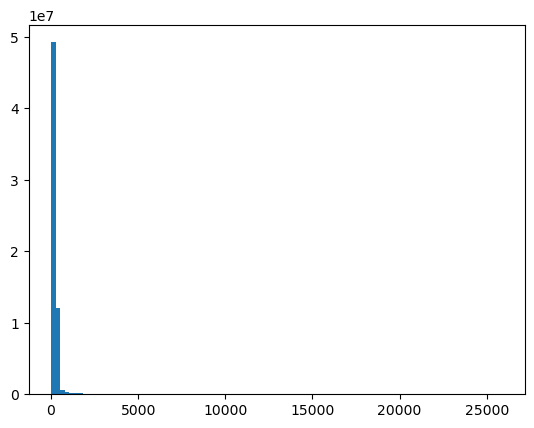

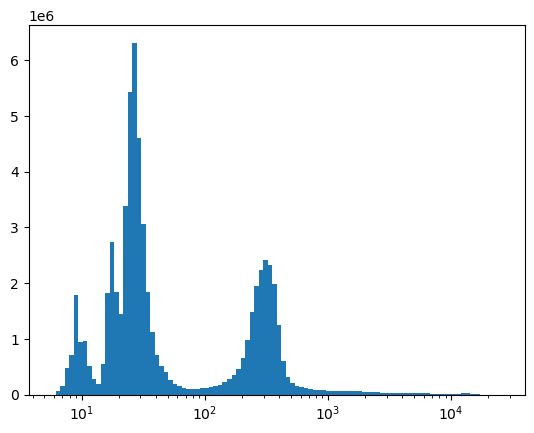

186.70982366045945
29.0


In [60]:
vals = mmus_avg.flatten()
n0_vals = vals[vals!=0]
hist, bins, _ = plt.hist(n0_vals, bins=100)
plt.show()
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(n0_vals, bins=logbins)
plt.xscale("log")
plt.show()
print(n0_vals.mean())
print(np.median(n0_vals))

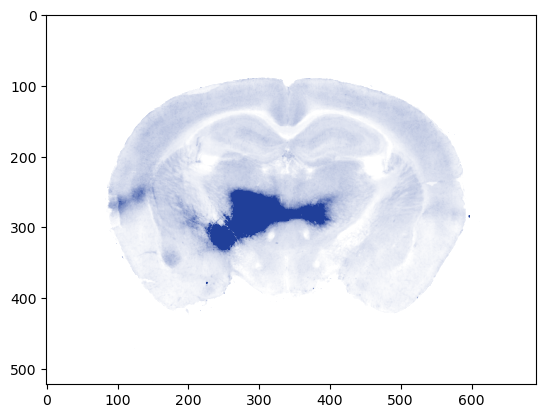

In [67]:

nslice = 97
plt.imshow(mmus_avg[nslice], cmap=blue_cmp, vmin=200, vmax=1000)


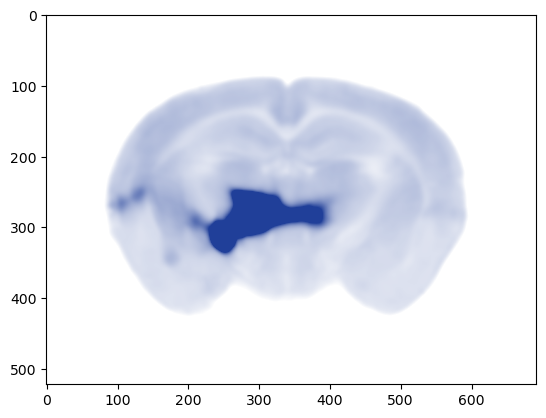

In [94]:
gs = 3
blur = gaussian_filter(mmus_avg, sigma=gs)
plt.imshow(blur[97], cmap=blue_cmp, vmin=100, vmax=1000)


In [109]:

ncontours=8
alpha=0.75
linewidths=1
levels = np.logspace(2,3,10)

levels

array([ 100.        ,  129.1549665 ,  166.81005372,  215.443469  ,
        278.25594022,  359.38136638,  464.15888336,  599.48425032,
        774.26368268, 1000.        ])

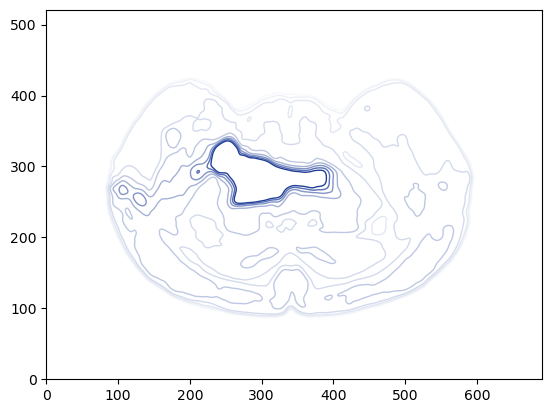

In [110]:

contour = plt.contour(blur[97], 10, levels=levels, cmap=blue_cmp, linewidths=linewidths)
plt.show()
# add outline
# plot_masks = ["grey", "CTX", "CP", "TH", "HY"]
# outline = make_boundaries_dict(plot_areas=plot_masks, mask_dict=masks)
# plt.imshow(outline[nslice], cmap="Greys")
# axs = plt.gca()
# axs.axis('off')
# plt.show()

# plot_contour(mmus_avg[97], mask_dict=masks, masks_to_plot=plot_masks)

## Slice 138